Load testfiles

In [24]:
# Import libraries
# !pip install lime
# os.chdir("../")
import os
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import random
# import lime
from lime import lime_tabular
import shap

import json
from typing import Union
from datetime import datetime as dt
import numpy as np

In [15]:
PROCESSED_DATA = "/storage/scratch/e17-fyp-xai/projects/e17-4yp-using-machine-learning-in-high-stake-settings/code/processed_data/processed_final_data_latest.csv"

In [16]:
raw_data = pd.read_csv(PROCESSED_DATA)

In [17]:
raw_data.head()

,Unnamed: 0,Project ID,Project Posted Date,Project Type,Project Posted Month,Project Subject Category Tree,Project Cost,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,...,Label,Teacher Success Rate,Teacher Success Rate Imputed,School City Success Rate,School City Success Rate Imputed,School Success Rate,School Success Rate Imputed,School County Success Rate,School County Success Rate Imputed,Project Count in State
0,0,699d6d657a8cd2a83ba09ee8bbb4bacf,2015-08-23,Teacher-Led,8,"Applied Learning, Special Needs",511.29,"Other, Special Needs",Grades PreK-2,Other,...,0,0.0,1,0.726070,0,1.0000,0,0.753059,0,3584
1,2,9712349367ff50b9eab00445594a25cd,2016-04-02,Teacher-Led,4,Literacy & Language,189.58,"ESL, Literacy",Grades PreK-2,Books,...,0,0.0,1,0.584906,0,0.3125,0,0.676056,0,7070
2,4,baa270ad21f432dcf6943cfe0cf51313,2016-09-16,Teacher-Led,9,Health & Sports,826.89,Health & Wellness,Grades 6-8,Supplies,...,0,0.0,1,0.621951,0,0.0000,0,0.658787,0,8875
3,6,cf54d3a016f6f715f5cea46f0aba15e0,2015-11-08,Teacher-Led,11,Literacy & Language,653.28,Literacy,Grades PreK-2,Books,...,0,0.0,1,0.600000,0,0.0000,1,0.694737,0,876
4,7,05970d5f4232634dee18e8e92a19c206,2014-08-01,Teacher-Led,8,Math & Science,690.67,Mathematics,Grades 3-5,Supplies,...,1,0.0,1,0.750000,0,0.0000,1,0.750000,0,627


In [18]:
raw_data[raw_data["Project ID"] == "cdc83b2eb031d999c123535bf09d24a0" ]

,Unnamed: 0,Project ID,Project Posted Date,Project Type,Project Posted Month,Project Subject Category Tree,Project Cost,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,...,Label,Teacher Success Rate,Teacher Success Rate Imputed,School City Success Rate,School City Success Rate Imputed,School Success Rate,School Success Rate Imputed,School County Success Rate,School County Success Rate Imputed,Project Count in State
314336,603375,cdc83b2eb031d999c123535bf09d24a0,2016-11-14,Teacher-Led,11,Math & Science,3334.51,Mathematics,Grades PreK-2,Technology,...,1,0.4,0,0.388889,0,0.285714,0,0.614035,0,682


In [19]:
!ls

config.py	       Feature_Engineering.ipynb  model_parameters
data_processer.ipynb   Feature_Engineering.py	  __pycache__
data_processor.py      feature_engineer.py	  README.md
disagreement.ipynb     helper.py		  requirements.txt
disagreement.py        kernelshap_explainer.py	  run_explanations.py
disagreement_v2.ipynb  lime_explainer.py	  Sanity_checks.ipynb
eda.py		       main.py			  temporal_features.py
environment.yml        model_outputs		  treeshap_explainer.py


In [20]:
os.chdir("/storage/scratch/e17-fyp-xai/projects/thanujan/e17-4yp-using-machine-learning-in-high-stake-settings/code")
import os
import feature_engineer as fe 
import data_processor as dp
import config
from helper import (
    save_model,
    load_model,
    create_dirs,
    create_classification_models,
    create_logistic_regression_parameters,
    create_random_forest_parameters,
    create_xgb_classifier_parameters,
    log_intermediate_output_to_file,
    filter_dataset_by_date)
import temporal_features as tmpf
import config

In [21]:
data = dp.set_data_types_to_datetime(raw_data, ["Project Posted Date"])
data = filter_dataset_by_date(data)
data_1 = dp.encode_data(data, config.CATEGORICAL_COLS)
data_folds = fe.split_data_folds(data_1)


-----
train    2016-01-07 - 2016-07-05
test     2016-11-02 - 2016-12-02
(238834, 578)
(92313, 577)
(92313, 576)
(92313, 1)
(32134, 578)
(20079, 577)
(20079, 576)
(20079, 576)
Training set shape =  (92313, 576)
Testing set shape =  (20079, 576)
-----
-----
train    2015-09-09 - 2016-03-07
test     2016-07-05 - 2016-08-04
(314310, 578)
(105920, 577)
(105920, 576)
(105920, 1)
(146069, 578)
(18750, 577)
(18750, 576)
(18750, 576)
Training set shape =  (105920, 576)
Testing set shape =  (18750, 576)
-----
-----
train    2015-05-12 - 2015-11-08
test     2016-03-07 - 2016-04-06
(370969, 578)
(99939, 577)
(99939, 576)
(99939, 1)
(207731, 578)
(23932, 577)
(23932, 576)
(23932, 576)
Training set shape =  (99939, 576)
Testing set shape =  (23932, 576)
-----
-----
train    2015-01-12 - 2015-07-11
test     2015-11-08 - 2015-12-08
(416306, 578)
(61637, 577)
(61637, 576)
(61637, 1)
(270016, 578)
(18400, 577)
(18400, 576)
(18400, 576)
Training set shape =  (61637, 576)
Testing set shape =  (18400, 576)

In [22]:
# for data in :
#     if data=="cdc83b2eb031d999c123535bf09d24a0":
#         print(data)

data_folds[0]["x_test"][data_folds[0]["x_test"]["Project ID"] == "cdc83b2eb031d999c123535bf09d24a0"].columns == 

SyntaxError: invalid syntax (1194054332.py, line 5)

In [25]:
from disagreement import Disagreement
import json

In [26]:
!ls 

config.py	       Feature_Engineering.ipynb  model_parameters
data_processer.ipynb   Feature_Engineering.py	  __pycache__
data_processor.py      feature_engineer.py	  README.md
disagreement.ipynb     helper.py		  requirements.txt
disagreement.py        kernelshap_explainer.py	  run_explanations.py
disagreement_v2.ipynb  lime_explainer.py	  Sanity_checks.ipynb
eda.py		       main.py			  temporal_features.py
environment.yml        model_outputs		  treeshap_explainer.py


In [27]:
explanations = json.load(open("/storage/scratch/e17-fyp-xai/projects/e17-4yp-using-machine-learning-in-high-stake-settings/code/model_outputs_5/xai_results/all_exp.json"))

In [28]:
!ls /storage/scratch/e17-fyp-xai/projects/e17-4yp-using-machine-learning-in-high-stake-settings/

 code
 code_base_II
 docs
 Documents
 EDA_Projects.ipynb
 fold_data
'Model explaination for top 50 and bottom 50 -- lime.ipynb'
 nohup.out
 output_Xai_latest.out
 output_Xai_latest_sep_18.out
 output_Xai_latest_sep_19.out
 output_Xai.out
'ratio_of averages.csv'
 README.md
 Sanity_checks_2.ipynb
 Sanity_checks.ipynb
 thanujan.py
 Untitled.ipynb
 XAI_Pipeline.ipynb
 XAI_Pipeline_latest.ipynb
 XAI_Pipeline_new.ipynb
 XAI_Pipeline_new_latest_out.ipynb
 XAI_Pipeline_new_out.ipynb
 XAI_Pipeline_result_16_sep.ipynb
 XAI_Pipeline_sep_18.ipynb
 XAI_Pipeline_sep_19.ipynb
 XAI_Pipeline_sep_21_top_500_bottom_500.ipynb
 XAI_Pipeline_sep_22_top_500_bottom_500_2.ipynb
 XAI_Pipeline_sep_22_top_500_bottom_500.ipynb
 XAI_Pipeline_sep_23_latest.ipynb
 XAI_Pipeline_sep_23_latest_output.ipynb
 XAI_Pipeline_test.ipynb
 xai_results
 xai_test_results


In [29]:
explanations.keys()

dict_keys(['fold5', 'fold4', 'fold3', 'fold2', 'fold1', 'fold0'])

In [30]:
explanations["fold0"].keys()

dict_keys(['lime', 'treeshap'])

In [31]:
explanations["fold0"]["lime"].keys()

dict_keys(['top', 'bottom'])

Projects in the lime top explanations

In [32]:
list(explanations["fold0"]["lime"]["top"].keys())[:10]

['cdc83b2eb031d999c123535bf09d24a0',
 '203c08ca3b1e42a9ba07c93eac4c20cc',
 'd1fb6298685f8afb718cc48543e2e244',
 'a2d940be8dc020e99c4f23fa979994bf',
 'f82498e55e15c90643967f8a38ddd98c',
 '53421ba867de46ff359de40e9753711e',
 '4b972ebb44d4ffc7516c8ff160301ef3',
 '243ac2a985a19d4df09c21541494dcae',
 'd1715d9dc331bee79ee781ff26684f8f',
 '6e87bf75a7ec7e474e90aef4188a7007']

Projects in the lime bottom explanations

In [33]:
list(explanations["fold0"]["lime"]["bottom"].keys())[:10]

['9922bc88316d50dc9fec75ace1f6428d',
 'cfbd2d9e5b4e27068f9463b029a3d777',
 '93b9f3988e3941f7acf43b2917e823fe',
 '975a0183c407402eb3fc4b32fe2df0a5',
 '77d5e0dc0c59a21425cc417f43266b99',
 'b53c6be1e99af4ad3b782cbbbc14c209',
 'd0cfa36c791f4d83123c4b9853983418',
 'bca108ff397e3f4461a6dbe966996eae',
 '1e45580a189dcba2b0a581aea5690850',
 '914ed5ecded471bcb3922ccf422d9265']

Projects in the treeshap top explanations

In [34]:
list(explanations["fold0"]["treeshap"]["top"].keys())[:10]

['cdc83b2eb031d999c123535bf09d24a0',
 '203c08ca3b1e42a9ba07c93eac4c20cc',
 'd1fb6298685f8afb718cc48543e2e244',
 'a2d940be8dc020e99c4f23fa979994bf',
 'f82498e55e15c90643967f8a38ddd98c',
 '53421ba867de46ff359de40e9753711e',
 '4b972ebb44d4ffc7516c8ff160301ef3',
 '243ac2a985a19d4df09c21541494dcae',
 'd1715d9dc331bee79ee781ff26684f8f',
 '6e87bf75a7ec7e474e90aef4188a7007']

Projects in the treeshap bottom explanations

In [35]:
list(explanations["fold0"]["treeshap"]["bottom"].keys())[:10]

['9922bc88316d50dc9fec75ace1f6428d',
 'cfbd2d9e5b4e27068f9463b029a3d777',
 '93b9f3988e3941f7acf43b2917e823fe',
 '975a0183c407402eb3fc4b32fe2df0a5',
 '77d5e0dc0c59a21425cc417f43266b99',
 'b53c6be1e99af4ad3b782cbbbc14c209',
 'd0cfa36c791f4d83123c4b9853983418',
 'bca108ff397e3f4461a6dbe966996eae',
 '1e45580a189dcba2b0a581aea5690850',
 '914ed5ecded471bcb3922ccf422d9265']

features in the lime top explanations

In [36]:
len(list(zip(*list(explanations["fold0"]["lime"]["top"].values())[0][:]))[0])

len(data_folds[0]["x_test"][data_folds[0]["x_test"]["Project ID"] == "cdc83b2eb031d999c123535bf09d24a0"].columns[1:])

575

In [37]:
print(list(zip(*list(explanations["fold0"]["lime"]["top"].values())[0][:]))[0])

('Project Cost', 'School State_New Mexico', 'Project Subject Subcategory Tree_Mathematics, Performing Arts', 'School State_Mississippi', 'School State_Nebraska', 'Project Subject Subcategory Tree_Economics, Performing Arts', 'Project Subject Subcategory Tree_College & Career Prep, Environmental Science', 'School State_Oregon', 'Project Subject Subcategory Tree_ESL, Performing Arts', 'Project Resource Category_Technology', 'Project Subject Subcategory Tree_Character Education, Social Sciences', 'Project Subject Category Tree_Health & Sports, Math & Science', 'Project Subject Subcategory Tree_Other, Social Sciences', 'School State_Missouri', 'Project Subject Subcategory Tree_Early Development, Environmental Science', 'Project Subject Subcategory Tree_Community Service, Extracurricular', 'Project Subject Subcategory Tree_Character Education, Civics & Government', 'Project Subject Subcategory Tree_Civics & Government, Community Service', 'Project Subject Subcategory Tree_Foreign Languages,

In [38]:
print(data_folds[0]["x_test"][data_folds[0]["x_test"]["Project ID"] == "cdc83b2eb031d999c123535bf09d24a0"].columns[1:])

Index(['Project Posted Month', 'Project Cost', 'School Percentage Free Lunch',
       'Teacher Project Posted Sequence', 'Teacher Success Rate',
       'Teacher Success Rate Imputed', 'School City Success Rate',
       'School City Success Rate Imputed', 'School Success Rate',
       'School Success Rate Imputed',
       ...
       'School State_Washington', 'School State_West Virginia',
       'School State_Wisconsin', 'School State_Wyoming', 'Teacher Prefix_Dr.',
       'Teacher Prefix_Mr.', 'Teacher Prefix_Mrs.', 'Teacher Prefix_Ms.',
       'Teacher Prefix_Mx.', 'Teacher Prefix_Teacher'],
      dtype='object', length=575)


features in the lime bottom explanations

In [39]:
list(zip(*list(explanations["fold0"]["lime"]["bottom"].values())[0][:10]))[0]

('School State_New Mexico',
 'Project Cost',
 'School State_Mississippi',
 'School State_Oregon',
 'Project Subject Subcategory Tree_College & Career Prep, Early Development',
 'Project Subject Category Tree_Music & The Arts, History & Civics',
 'Project Subject Subcategory Tree_Literature & Writing, Other',
 'Project Subject Subcategory Tree_Community Service, Environmental Science',
 'Project Subject Subcategory Tree_Community Service, Mathematics',
 'Project Subject Subcategory Tree_Civics & Government, Visual Arts')

features in the treeshap top explanations

In [40]:
list(zip(*list(explanations["fold0"]["treeshap"]["top"].values())[0][:10]))[0]

('Project Cost',
 'School State_Mississippi',
 'Project Resource Category_Technology',
 'Teacher Project Posted Sequence',
 'School City Success Rate',
 'School Success Rate',
 'Teacher Success Rate',
 'Teacher Success Rate Imputed',
 'School County Success Rate',
 'Project Count in State')

features in the treeshap bottom explanations

In [41]:
list(zip(*list(explanations["fold0"]["treeshap"]["bottom"].values())[0][:10]))[0]



('Project Cost',
 'School State_Illinois',
 'School Success Rate',
 'Project Resource Category_Technology',
 'Project Posted Month',
 'Teacher Project Posted Sequence',
 'Teacher Success Rate',
 'Project Count in State',
 'Project Resource Category_Books',
 'Teacher Success Rate Imputed')

In [93]:
project_explanation = explanations["fold0"]["treeshap"]["bottom"]["9922bc88316d50dc9fec75ace1f6428d"]

# Make the feature vs important score list into dictionary
project = {}
for feature in project_explanation:
    if feature[0] not in project.keys():
        project[feature[0]] = feature[1]
        
    else:
        print(f"{feature[0]} has duplicates")
        
    

In [94]:
feature , important_score = project_explanation[0]

In [130]:
feature_space_with_importance = {}

for feature , important_score in  project_explanation:
    if len(feature.split("_")) == 1:
        feature_space_with_importance[feature.split("_")[0]] = important_score
        
    elif feature.split("_")[0] in feature_space_with_importance.keys():
        feature_space_with_importance[feature.split("_")[0]][feature]=  important_score
    else:
        feature_space_with_importance[feature.split("_")[0]]= {}
        feature_space_with_importance[feature.split("_")[0]][feature]=  important_score
        
# compacted_explanation = []
# for feature in compacted_features.keys():
#     #! duplicate keys
#     compacted_explanation.append([feature, max(compacted_features[feature], key= lambda x : abs(x))])

print(feature_space_with_importance)

{'Project Cost': -0.02602504681196933, 'School State': {'School State_Illinois': -0.02180424855480396, 'School State_New York': -0.0015074806829943554, 'School State_New Jersey': -0.0005795116676927136, 'School State_Massachusetts': 0.0005370641225545114, 'School State_Pennsylvania': 0.0005351177916600136, 'School State_Missouri': -0.000510592402297334, 'School State_North Carolina': 0.0004209882833447409, 'School State_New Mexico': -0.0003621141724579502, 'School State_Alabama': -0.00032283463115163614, 'School State_Indiana': -0.0003145353738727863, 'School State_Mississippi': -0.00031287878246075704, 'School State_Michigan': -0.0002755996493579005, 'School State_Colorado': 0.0001629375236461783, 'School State_Nevada': -0.0001612996661060606, 'School State_Ohio': -9.34854031766008e-05, 'School State_Arizona': 8.549149137252244e-05, 'School State_Florida': 6.662429377684021e-05, 'School State_Washington': -6.578171525688958e-05, 'School State_California': 5.3923177929391387e-05, 'Scho

In [131]:
feature_space_with_importance

{'Project Cost': -0.02602504681196933,
 'School State': {'School State_Illinois': -0.02180424855480396,
  'School State_New York': -0.0015074806829943554,
  'School State_New Jersey': -0.0005795116676927136,
  'School State_Massachusetts': 0.0005370641225545114,
  'School State_Pennsylvania': 0.0005351177916600136,
  'School State_Missouri': -0.000510592402297334,
  'School State_North Carolina': 0.0004209882833447409,
  'School State_New Mexico': -0.0003621141724579502,
  'School State_Alabama': -0.00032283463115163614,
  'School State_Indiana': -0.0003145353738727863,
  'School State_Mississippi': -0.00031287878246075704,
  'School State_Michigan': -0.0002755996493579005,
  'School State_Colorado': 0.0001629375236461783,
  'School State_Nevada': -0.0001612996661060606,
  'School State_Ohio': -9.34854031766008e-05,
  'School State_Arizona': 8.549149137252244e-05,
  'School State_Florida': 6.662429377684021e-05,
  'School State_Washington': -6.578171525688958e-05,
  'School State_Calif

In [141]:
compacted_feature_abs_max = []

for parent_feature, children_space in feature_space_with_importance.items():
    if parent_feature in config.CATEGORICAL_COLS:
        compacted_feature_abs_max.append([parent_feature,  max(children_space.values(), key= lambda x : abs(x))])
    else:
        compacted_feature_abs_max.append([parent_feature, feature_space_with_importance[parent_feature]])

In [142]:
compacted_feature_abs_max

[['Project Cost', -0.02602504681196933],
 ['School State', -0.02180424855480396],
 ['School Success Rate', -0.017505583778207667],
 ['Project Resource Category', -0.006742306857236144],
 ['Project Posted Month', 0.006214428558841974],
 ['Teacher Project Posted Sequence', -0.004799128680804188],
 ['Teacher Success Rate', 0.004406902267389796],
 ['Project Count in State', -0.00336914051841859],
 ['Teacher Success Rate Imputed', -0.002817042707292785],
 ['School Percentage Free Lunch', 0.002125179466502232],
 ['Teacher Prefix', -0.0017303964151915352],
 ['School Metro Type', -0.0010255550905412746],
 ['School City Success Rate', -0.0008568011747343007],
 ['School Success Rate Imputed', -0.00025358081345757457],
 ['Project Subject Category Tree', -0.00025057993518544207],
 ['Project Grade Level Category', -0.0002342117682837852],
 ['School City Success Rate Imputed', -0.00022143448928545694],
 ['Project Subject Subcategory Tree', -8.532835632649948e-05],
 ['School County Success Rate', 4.2

In [134]:
activated_features = {}
for feature in config.CATEGORICAL_COLS:
    activated_features[feature] = f"{feature}_{raw_data[raw_data['Project ID'] == 'cdc83b2eb031d999c123535bf09d24a0' ][feature].values[0]}"

In [135]:
activated_features["School State"]

'School State_Mississippi'

In [136]:
feature_space_with_importance.keys()

dict_keys(['Project Cost', 'School State', 'School Success Rate', 'Project Resource Category', 'Project Posted Month', 'Teacher Project Posted Sequence', 'Teacher Success Rate', 'Project Count in State', 'Teacher Success Rate Imputed', 'School Percentage Free Lunch', 'Teacher Prefix', 'School Metro Type', 'School City Success Rate', 'School Success Rate Imputed', 'Project Subject Category Tree', 'Project Grade Level Category', 'School City Success Rate Imputed', 'Project Subject Subcategory Tree', 'School County Success Rate', 'School County Success Rate Imputed', 'Project Type'])

In [145]:
compacted_project_explanation_activated_importance =[]

for parent_feature in feature_space_with_importance.keys():
    if parent_feature in config.CATEGORICAL_COLS:
        compacted_project_explanation_activated_importance.append([parent_feature,feature_space_with_importance[parent_feature][activated_features[parent_feature]]])
    else:
        compacted_project_explanation_activated_importance.append([parent_feature,feature_space_with_importance[parent_feature]])

print(compacted_project_explanation_activated_importance)

[['Project Cost', -0.02602504681196933], ['School State', -0.00031287878246075704], ['School Success Rate', -0.017505583778207667], ['Project Resource Category', -0.006742306857236144], ['Project Posted Month', 0.006214428558841974], ['Teacher Project Posted Sequence', -0.004799128680804188], ['Teacher Success Rate', 0.004406902267389796], ['Project Count in State', -0.00336914051841859], ['Teacher Success Rate Imputed', -0.002817042707292785], ['School Percentage Free Lunch', 0.002125179466502232], ['Teacher Prefix', -0.00024137083285950212], ['School Metro Type', -0.0002933678690078523], ['School City Success Rate', -0.0008568011747343007], ['School Success Rate Imputed', -0.00025358081345757457], ['Project Subject Category Tree', -6.766490165318828e-05], ['Project Grade Level Category', 0.00013671097005499178], ['School City Success Rate Imputed', -0.00022143448928545694], ['Project Subject Subcategory Tree', 1.8585182770038954e-05], ['School County Success Rate', 4.2482024859396006

In [143]:
project_explanation_non_activated_max =[]

for parent_feature in feature_space_with_importance.keys():
    if parent_feature in config.CATEGORICAL_COLS:
        max_importance = 0
        for feature, importance in feature_space_with_importance[parent_feature].items():
            if feature != activated_features[parent_feature] and abs(importance) > abs(max_importance) :
                max_importance = importance
                
        project_explanation_non_activated_max.append([parent_feature,max_importance])
        
    else:
        project_explanation_non_activated_max.append([parent_feature,feature_space_with_importance[parent_feature]])
        
print(project_explanation_non_activated_max)

[['Project Cost', -0.02602504681196933], ['School State', -0.02180424855480396], ['School Success Rate', -0.017505583778207667], ['Project Resource Category', 0.0028691998338661053], ['Project Posted Month', 0.006214428558841974], ['Teacher Project Posted Sequence', -0.004799128680804188], ['Teacher Success Rate', 0.004406902267389796], ['Project Count in State', -0.00336914051841859], ['Teacher Success Rate Imputed', -0.002817042707292785], ['School Percentage Free Lunch', 0.002125179466502232], ['Teacher Prefix', -0.0017303964151915352], ['School Metro Type', -0.0010255550905412746], ['School City Success Rate', -0.0008568011747343007], ['School Success Rate Imputed', -0.00025358081345757457], ['Project Subject Category Tree', -0.00025057993518544207], ['Project Grade Level Category', -0.0002342117682837852], ['School City Success Rate Imputed', -0.00022143448928545694], ['Project Subject Subcategory Tree', -8.532835632649948e-05], ['School County Success Rate', 4.2482024859396006e-0

Take the project explanations --> feature A_1 : s1, feature A_2: s2, feature A_4: s3, feature A_4: s4 ....

Group the explanations based on max score --> feature A_1 : s1, feature A_2: s2, feature A_4: s3, feature A_4: s4 .... --> 
                            fature A : s = max (abs(s1, s2, s3 s4 ...))
                            

Take the explanation for a project  and Take feature space of the project, multply both and take the some
Group the explanations based on max score --> feature A_1 : s1, feature A_2: s2, feature A_4: s3, feature A_4: s4 .... --> 
                            fature A : s =  (s1, s2, s3 s4 ...) * ( 1, 0, 0 , 0, .. )
                            
                            
                            
                            

### Let's say i am considering the first explanation in the treeshap and the first explanation in the lime

The explanation pertains to the projects considered high critical according to the model's evaluation.

In [15]:
disagreement = Disagreement(explanations["fold0"]["treeshap"]["top"]["cdc83b2eb031d999c123535bf09d24a0"], explanations["fold0"]["lime"]["top"]["cdc83b2eb031d999c123535bf09d24a0"])

In [16]:
disagreement.get_disagreement(20, None)

{'feature_agreement': 0.15,
 'rank_agreement': 0.05,
 'sign_agreement': 0.15,
 'signed_rank_agreement': 0.05}

In [17]:
disagreement.sorted_explanation1[:20]

[['Project Cost', 0.05714906222884565],
 ['School State_Mississippi', 0.041025607910487455],
 ['Project Resource Category_Technology', 0.022928445398821395],
 ['Teacher Project Posted Sequence', 0.017752762721138425],
 ['School City Success Rate', 0.017585039435300587],
 ['School Success Rate', 0.014126902513215783],
 ['Teacher Success Rate', 0.009001123399286826],
 ['Teacher Success Rate Imputed', 0.0075924428426549185],
 ['School County Success Rate', 0.005877010966310081],
 ['Project Count in State', 0.003946468204571829],
 ['Project Resource Category_Books', 0.0035422505235283095],
 ['School Metro Type_unknown', 0.003488676856704842],
 ['Project Resource Category_Supplies', 0.0033089717177392686],
 ['Project Posted Month', 0.0028910216754434257],
 ['School Percentage Free Lunch', 0.0027158185248663358],
 ['Project Subject Subcategory Tree_Mathematics', 0.002388253706089927],
 ['Project Subject Category Tree_Math & Science', 0.0022903894063142616],
 ['Teacher Prefix_Ms.', 0.00168747

In [18]:
disagreement.sorted_explanation2[:20]


[['Project Cost', 0.05828515065993562],
 ['School State_New Mexico', -0.04561995832431883],
 ['Project Subject Subcategory Tree_Mathematics, Performing Arts',
  -0.03652875725130923],
 ['School State_Mississippi', 0.03525123751671513],
 ['School State_Nebraska', -0.030140219371630757],
 ['Project Subject Subcategory Tree_Economics, Performing Arts',
  0.028696205307718412],
 ['Project Subject Subcategory Tree_College & Career Prep, Environmental Science',
  0.025975377818970764],
 ['School State_Oregon', 0.02477959436814468],
 ['Project Subject Subcategory Tree_ESL, Performing Arts',
  0.024418609316633387],
 ['Project Resource Category_Technology', 0.02412976165593627],
 ['Project Subject Subcategory Tree_Character Education, Social Sciences',
  -0.023669453164068096],
 ['Project Subject Category Tree_Health & Sports, Math & Science',
  -0.023382474876373693],
 ['Project Subject Subcategory Tree_Other, Social Sciences',
  0.023007167202545663],
 ['School State_Missouri', -0.0227186955

#### All the metrics shows that there is significant disagreement for the first explanation

Based on top 20 features in the first explanation of lime and treeshap


Feature Agreement 0.15: The feature agreement score is 0.15. This indicates that the top 20 features in Lime's explanation are different from TreeSHAP's top 20 features.

Rank Agreement 0.05: The rank agreement score is 0.05. This means that not only are the top 20 features different, but there is also a significant difference in the order of these features between Lime and TreeSHAP.

Sign Agreement 0.15: The sign agreement score is 0.15. This suggests that the top 20 features in Lime's explanation have different features compared to TreeSHAP's top 20 features when considering the sign of the feature values.

Signed Rank Agreement 0.05: The signed rank agreement score is 0.05. This implies that the top 20 features in Lime's explanation not only differ in terms of the features themselves but also in their rank and sign when compared to TreeSHAP's top 20 features.

### Let's say i am considering the last explanation in the treeshap and the first explanation in the lime 
The explanation pertains to the projects considered less critical according to the model's evaluation.

In [19]:
disagreement = Disagreement(explanations["fold0"]["treeshap"]["bottom"]["914ed5ecded471bcb3922ccf422d9265"], explanations["fold0"]["lime"]["bottom"]["914ed5ecded471bcb3922ccf422d9265"])

In [20]:
disagreement.get_disagreement(20, None)

{'feature_agreement': 0.1,
 'rank_agreement': 0.0,
 'sign_agreement': 0.1,
 'signed_rank_agreement': 0.0}

In [21]:
disagreement.sorted_explanation1[:20]


[['School Success Rate', -0.02073560551451692],
 ['Project Resource Category_Books', -0.01770426358118641],
 ['Project Cost', -0.016155206447674573],
 ['School City Success Rate', -0.007373891001113861],
 ['School County Success Rate', -0.006529038491705706],
 ['Project Resource Category_Technology', -0.006248685005766674],
 ['Project Posted Month', 0.005906740663720029],
 ['Teacher Project Posted Sequence', -0.004860845310354307],
 ['Teacher Success Rate', 0.0041988864940344685],
 ['School Percentage Free Lunch', -0.003522525960356688],
 ['Teacher Success Rate Imputed', -0.002740343722766738],
 ['School State_New York', -0.0014524365215038415],
 ['Teacher Prefix_Ms.', 0.0014260352586097725],
 ['Project Resource Category_Supplies', 0.0007945032990460276],
 ['School Metro Type_urban', -0.0005636251404314408],
 ['School State_Massachusetts', 0.0005606948675085733],
 ['School State_Pennsylvania', 0.0005600543254786316],
 ['School State_New Jersey', -0.000550105219103898],
 ['Project Count

In [22]:
disagreement.sorted_explanation2[:20]

[['School State_New Mexico', -0.039534328867710765],
 ['Project Subject Subcategory Tree_Early Development, Team Sports',
  0.03927456784041016],
 ['School State_Oregon', 0.0359405748502581],
 ['Project Subject Category Tree_Health & Sports, History & Civics',
  0.03567932952839871],
 ['Project Subject Subcategory Tree_Character Education, Mathematics',
  0.031610236047156556],
 ['Project Cost', -0.02952929601923634],
 ['Project Subject Subcategory Tree_Foreign Languages, Literature & Writing',
  -0.029357881597820344],
 ['Project Subject Subcategory Tree_Environmental Science, Music',
  0.0287163292291289],
 ['Project Subject Subcategory Tree_College & Career Prep, Financial Literacy',
  0.028657001397669433],
 ['Project Subject Subcategory Tree_Social Sciences, Visual Arts',
  0.028511500035182127],
 ['Project Subject Subcategory Tree_Economics, Financial Literacy',
  -0.0282102779224615],
 ['Project Subject Subcategory Tree_ESL, History & Geography',
  0.02800016263929736],
 ['Proje

#### All the metrics shows that there is significant disagreement for the first explanation

Based on top 20 features in the first explanation of lime and treeshap


Feature Agreement 0.1: The feature agreement score is 0.1. This indicates that the top 20 features in Lime's explanation are different from TreeSHAP's top 20 features.

Rank Agreement 0.0: The rank agreement score is 0.0. This means that there are no matching top 20 features in Lime and TreeSHAP in terms of their order.

Sign Agreement 0.1: The sign agreement score is 0.1. This suggests that the top 20 features in Lime's explanation have different features compared to TreeSHAP's top 20 features when considering the sign of the feature values.

Signed Rank Agreement 0.0: The signed rank agreement score is 0.0. This implies that there are no top 20 features in Lime's explanation that match in terms of the features themselves, their rank, and their sign when compared to TreeSHAP's top 20 features.

## Top 500 and bottom 500 projects with top 20 features as per each explanation

### Let's say I am considering the explanations of TreeSHAP and LIME for the top 500 projects.
The explanation pertains to the projects considered critical according to the model's evaluation.

In [23]:

disgreement_mean_top = {'feature_agreement': 0,
 'rank_agreement': 0,
 'sign_agreement': 0,
 'signed_rank_agreement': 0.0}

projects = list(explanations["fold0"]["lime"]["top"].keys())

for project_id in projects:
    disagreement_calc = Disagreement(explanations["fold0"]["lime"]["top"][project_id], explanations["fold0"]["treeshap"]["top"][project_id])
    
    disagreement = disagreement_calc.get_disagreement(20, None) 
    for key in list(disgreement_mean_top.keys()):
        disgreement_mean_top[key] += disagreement[key]

for key in list(disgreement_mean_top.keys()):
    disgreement_mean_top[key] = disgreement_mean_top[key] / len(projects)

print("Mean diagreement accross top 500 projects that are not going to get funded according to the model:" )

for key in list(disgreement_mean_top.keys()):
    print(f"{key} : {round(disgreement_mean_top[key],3)}")


    
    

    

Mean diagreement accross top 500 projects that are not going to get funded according to the model:
feature_agreement : 0.136
rank_agreement : 0.048
sign_agreement : 0.133
signed_rank_agreement : 0.048


#### All the metrics shows that there is significant disagreement for the top 500 explanation

Based on top 20 features in the first explanation of lime and treeshap


Feature Agreement 0.136: The feature agreement score is 0.136. This indicates that the top 20 features in Lime's explanation are different from TreeSHAP's top 20 features.

Rank Agreement 0.048: The rank agreement score is 0.048. This means that not only are the top 20 features different, but there is also a significant difference in the order of these features between Lime and TreeSHAP.

Sign Agreement 0.133: The sign agreement score is 0.133. This suggests that the top 20 features in Lime's explanation have different features compared to TreeSHAP's top 20 features when considering the sign of the feature values.

Signed Rank Agreement 0.048: The signed rank agreement score is 0.048. This implies that the top 20 features in Lime's explanation not only differ in terms of the features themselves but also in their rank and sign when compared to TreeSHAP's top 20 features.

### Let's say I am considering the explanations of TreeSHAP and LIME for the bottom 500 projects.
The explanation pertains to the projects considered critical according to the model's evaluation.

In [24]:

disgreement_mean_bottom = {'feature_agreement': 0,
 'rank_agreement': 0,
 'sign_agreement': 0,
 'signed_rank_agreement': 0.0}

projects = list(explanations["fold0"]["lime"]["bottom"].keys())

for project_id in projects:
    disagreement_calc = Disagreement(explanations["fold0"]["lime"]["bottom"][project_id], explanations["fold0"]["treeshap"]["bottom"][project_id])
    
    disagreement = disagreement_calc.get_disagreement(20, None) 
    for key in list(disgreement_mean_bottom.keys()):
        disgreement_mean_bottom[key] += disagreement[key]

for key in list(disgreement_mean_bottom.keys()):
    disgreement_mean_bottom[key] = disgreement_mean_bottom[key] / len(projects)

print("Mean diagreement accross bottom 500 projects that are not going to get funded according to the model:" )

for key in list(disgreement_mean_bottom.keys()):
    print(f"{key} : {round(disgreement_mean_bottom[key],3)}")


    
    

    

Mean diagreement accross bottom 500 projects that are not going to get funded according to the model:
feature_agreement : 0.129
rank_agreement : 0.018
sign_agreement : 0.128
signed_rank_agreement : 0.018


#### All the metrics shows that there is significant disagreement for the top 500 explanation

Based on top 20 features in the first explanation of lime and treeshap


Feature Agreement 0.129: The feature agreement score is 0.129. This indicates that the top 20 features in Lime's explanation are different from TreeSHAP's top 20 features.

Rank Agreement 0.018: The rank agreement score is 0.018. This means that not only are the top 20 features different, but there is also a significant difference in the order of these features between Lime and TreeSHAP.

Sign Agreement 0.128: The sign agreement score is 0.128. This suggests that the top 20 features in Lime's explanation have different features compared to TreeSHAP's top 20 features when considering the sign of the feature values.

Signed Rank Agreement 0.018: The signed rank agreement score is 0.018. This implies that the top 20 features in Lime's explanation not only differ in terms of the features themselves but also in their rank and sign when compared to TreeSHAP's top 20 features.

### Conclusion: the top 500 and bottom 500 connsidering the top 20 features as per each explanations

When we consider the bottom and top 500 projects, where the top 500 projects are indicating a high probability of not being funded, and the bottom 500 are the opposite, ***we can observe that the bottom 500 projects shows a significant level of disagreement compared to the top 500 projects on average.***


## Top 500 and bottom 500 projects with top 100 features as per each explanation

### Let's say I am considering the explanations of TreeSHAP and LIME for the top 500 projects.
The explanation pertains to the projects considered critical according to the model's evaluation.

In [25]:

disgreement_mean_top = {'feature_agreement': 0,
 'rank_agreement': 0,
 'sign_agreement': 0,
 'signed_rank_agreement': 0.0}

projects = list(explanations["fold0"]["lime"]["top"].keys())

for project_id in projects:
    disagreement_calc = Disagreement(explanations["fold0"]["lime"]["top"][project_id], explanations["fold0"]["treeshap"]["top"][project_id])
    
    disagreement = disagreement_calc.get_disagreement(100, None) 
    for key in list(disgreement_mean_top.keys()):
        disgreement_mean_top[key] += disagreement[key]

for key in list(disgreement_mean_top.keys()):
    disgreement_mean_top[key] = disgreement_mean_top[key] / len(projects)

print("Mean diagreement accross top 500 projects that are not going to get funded according to the model:" )

for key in list(disgreement_mean_top.keys()):
    print(f"{key} : {round(disgreement_mean_top[key],3)}")


    
    

    

Mean diagreement accross top 500 projects that are not going to get funded according to the model:
feature_agreement : 0.201
rank_agreement : 0.011
sign_agreement : 0.192
signed_rank_agreement : 0.011


#### All the metrics shows that there is significant disagreement for the top 500 explanation

Based on top 100 features in the first explanation of lime and treeshap


Feature Agreement 0.201: The feature agreement score is 0.201. This indicates that the top 100 features in Lime's explanation are different from TreeSHAP's top 20 features.

Rank Agreement 0.011: The rank agreement score is 0.011. This means that not only are the top 100 features different, but there is also a significant difference in the order of these features between Lime and TreeSHAP.

Sign Agreement 0.192: The sign agreement score is 0.192. This suggests that the top 100 features in Lime's explanation have different features compared to TreeSHAP's top 20 features when considering the sign of the feature values.

Signed Rank Agreement 0.011: The signed rank agreement score is 0.011. This implies that the top 100 features in Lime's explanation not only differ in terms of the features themselves but also in their rank and sign when compared to TreeSHAP's top 20 features.

### Let's say I am considering the explanations of TreeSHAP and LIME for the bottom 500 projects.
The explanation pertains to the projects considered critical according to the model's evaluation.

In [26]:

disgreement_mean_bottom = {'feature_agreement': 0,
 'rank_agreement': 0,
 'sign_agreement': 0,
 'signed_rank_agreement': 0.0}

projects = list(explanations["fold0"]["lime"]["bottom"].keys())

for project_id in projects:
    disagreement_calc = Disagreement(explanations["fold0"]["lime"]["bottom"][project_id], explanations["fold0"]["treeshap"]["bottom"][project_id])
    
    disagreement = disagreement_calc.get_disagreement(100, None) 
    for key in list(disgreement_mean_bottom.keys()):
        disgreement_mean_bottom[key] += disagreement[key]

for key in list(disgreement_mean_bottom.keys()):
    disgreement_mean_bottom[key] = disgreement_mean_bottom[key] / len(projects)

print("Mean diagreement accross bottom 500 projects that are not going to get funded according to the model:" )

for key in list(disgreement_mean_bottom.keys()):
    print(f"{key} : {round(disgreement_mean_bottom[key],3)}")


    
    

    

Mean diagreement accross bottom 500 projects that are not going to get funded according to the model:
feature_agreement : 0.193
rank_agreement : 0.005
sign_agreement : 0.184
signed_rank_agreement : 0.005


#### All the metrics shows that there is significant disagreement for the top 500 explanation

Based on top 20 features in the first explanation of lime and treeshap


Feature Agreement 0.193: The feature agreement score is 0.193. This indicates that the top 100 features in Lime's explanation are different from TreeSHAP's top 20 features.

Rank Agreement 0.005: The rank agreement score is 0.005. This means that not only are the top 100 features different, but there is also a significant difference in the order of these features between Lime and TreeSHAP.

Sign Agreement 0.184: The sign agreement score is 0.184. This suggests that the top 100 features in Lime's explanation have different features compared to TreeSHAP's top 20 features when considering the sign of the feature values.

Signed Rank Agreement 0.005: The signed rank agreement score is 0.005. This implies that the top 100 features in Lime's explanation not only differ in terms of the features themselves but also in their rank and sign when compared to TreeSHAP's top 100 features.

### Conclusion: the top 500 and bottom 500 connsidering the top 100 features as per each explanations

When we consider the bottom and top 500 projects, where the top 500 projects are indicating a high probability of not being funded, and the bottom 500 are the opposite, ***we can observe that the bottom 500 projects shows a significant level of disagreement compared to the top 500 projects on average.***


##Function to calculate average Diagreement

In [27]:
def disagreement_average(explanations1: dict , explanations2: dict , k: int, features_F: list) -> dict:
    disagreement_mean = {'feature_agreement': 0.0,
     'rank_agreement': 0.0,
     'sign_agreement': 0.0,
     'signed_rank_agreement': 0.0}

    for project_id in explanations1.keys():
        
#         print(len(explanations1.keys()))
#         print(explanations1[project_id][:20])
        
#         print(explanations2[project_id][:20])
        
        disagreement_calc_2 = Disagreement(explanations1[project_id], explanations2[project_id])

        disagreement = disagreement_calc_2.get_disagreement(k, features_F)
        
        
        for key in list(disagreement_mean.keys()):
            disagreement_mean[key] += disagreement[key]
    

    for key in list(disagreement_mean.keys()):
        disagreement_mean[key] = round(disagreement_mean[key] / len(explanations1.keys()),3)


#     print("Mean diagreement accross top 500 projects that are not going to get funded according to the model:" )

#     for key in list(disgreement_mean.keys()):
#         print(f"{key} : {round(disgreement_mean[key],3)}")
    
    return disagreement_mean

In [28]:

disgreement_mean_across__top_500_various_k = {'feature_agreement': [],
     'rank_agreement': [],
     'sign_agreement': [],
     'signed_rank_agreement': []}


for i in range(1,100,1):
    explanations_lime = disagreement_average(explanations["fold0"]["lime"]["top"], explanations["fold0"]["treeshap"]["top"], i, None)
    
    for key in list(disgreement_mean_across__top_500_various_k.keys()):
        disgreement_mean_across__top_500_various_k[key].append(explanations_lime[key])
    

# explanations_treeshap = explanations["fold0"]["treeshap"]["top"]
# print(disagreement_average(explanations_treeshap, 500, None))

disgreement_mean_across__bottom_500_various_k = {'feature_agreement': [],
     'rank_agreement': [],
     'sign_agreement': [],
     'signed_rank_agreement': []}

for i in range(1,100,1):
    explanations_lime = disagreement_average(explanations["fold0"]["lime"]["bottom"], explanations["fold0"]["treeshap"]["bottom"], i, None)
    
    for key in list(disgreement_mean_across__bottom_500_various_k.keys()):
        disgreement_mean_across__bottom_500_various_k[key].append(explanations_lime[key])


print(disgreement_mean_across__bottom_500_various_k)

    
    

    

{'feature_agreement': [0.309, 0.285, 0.218, 0.169, 0.139, 0.122, 0.111, 0.108, 0.107, 0.108, 0.111, 0.114, 0.117, 0.121, 0.122, 0.122, 0.125, 0.126, 0.127, 0.129, 0.131, 0.134, 0.137, 0.141, 0.146, 0.153, 0.161, 0.169, 0.178, 0.187, 0.195, 0.2, 0.203, 0.205, 0.206, 0.206, 0.206, 0.206, 0.206, 0.206, 0.206, 0.206, 0.206, 0.205, 0.204, 0.203, 0.203, 0.202, 0.202, 0.201, 0.2, 0.199, 0.198, 0.198, 0.198, 0.198, 0.197, 0.197, 0.196, 0.196, 0.196, 0.196, 0.196, 0.196, 0.196, 0.196, 0.196, 0.196, 0.195, 0.195, 0.196, 0.195, 0.195, 0.195, 0.195, 0.195, 0.195, 0.195, 0.195, 0.194, 0.194, 0.194, 0.194, 0.194, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193, 0.193], 'rank_agreement': [0.309, 0.169, 0.113, 0.085, 0.068, 0.057, 0.048, 0.043, 0.038, 0.034, 0.031, 0.029, 0.026, 0.025, 0.023, 0.021, 0.02, 0.019, 0.019, 0.018, 0.018, 0.018, 0.017, 0.016, 0.016, 0.015, 0.015, 0.015, 0.014, 0.014, 0.013, 0.013, 0.013, 0.012, 0.012, 0.012, 0.011, 0.011, 0.0

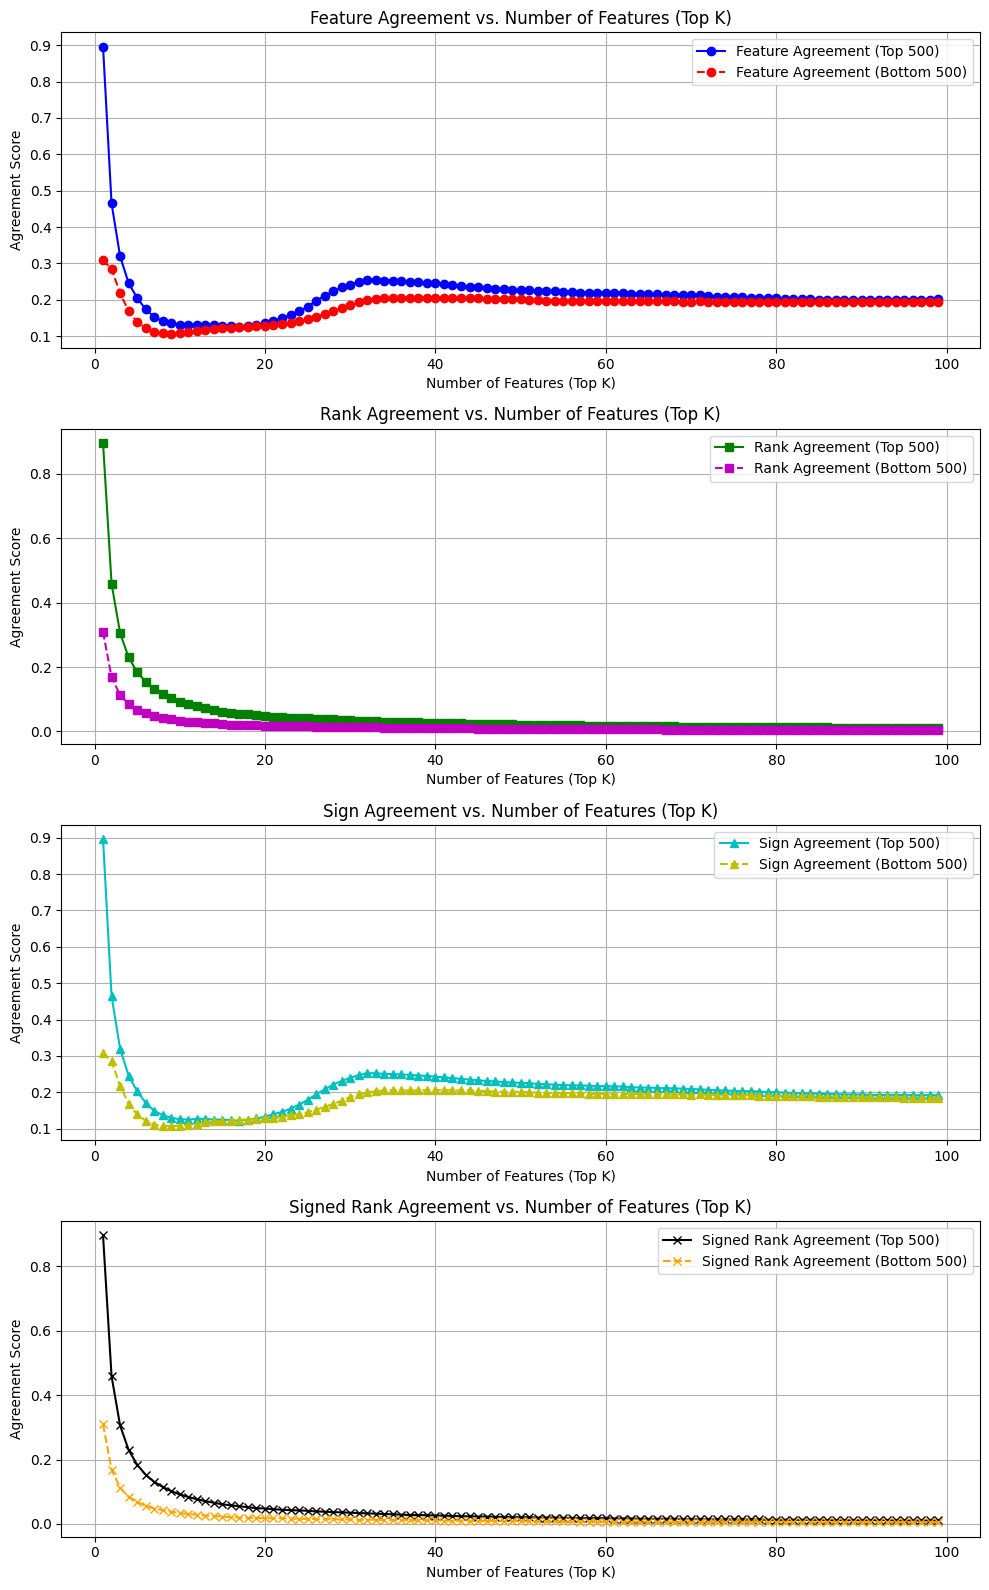

In [29]:
import matplotlib.pyplot as plt


values_of_500 = range(1, 100, 1)
feature_agreement_top = disgreement_mean_across__top_500_various_k["feature_agreement"]
rank_agreement_top = disgreement_mean_across__top_500_various_k["rank_agreement"]
sign_agreement_top = disgreement_mean_across__top_500_various_k["sign_agreement"]
signed_rank_agreement_top = disgreement_mean_across__top_500_various_k["signed_rank_agreement"]


feature_agreement_bottom = disgreement_mean_across__bottom_500_various_k["feature_agreement"]
rank_agreement_bottom = disgreement_mean_across__bottom_500_various_k["rank_agreement"]
sign_agreement_bottom = disgreement_mean_across__bottom_500_various_k["sign_agreement"]
signed_rank_agreement_bottom = disgreement_mean_across__bottom_500_various_k["signed_rank_agreement"]


# Create separate subplots for each agreement metric
fig, axs = plt.subplots(4, 1, figsize=(10, 16))

# Plot Feature Agreement for top 500
axs[0].plot(values_of_500, feature_agreement_top, label='Feature Agreement (Top 500)', marker='o', color='b')
axs[0].plot(values_of_500, feature_agreement_bottom, label='Feature Agreement (Bottom 500)', linestyle='--', marker='o', color='r')
axs[0].set_xlabel('Number of Features (Top K)')
axs[0].set_ylabel('Agreement Score')
axs[0].set_title('Feature Agreement vs. Number of Features (Top K)')
axs[0].legend()
axs[0].grid(True)

# Plot Rank Agreement for top 500
axs[1].plot(values_of_500, rank_agreement_top, label='Rank Agreement (Top 500)', marker='s', color='g')
axs[1].plot(values_of_500, rank_agreement_bottom, label='Rank Agreement (Bottom 500)', linestyle='--', marker='s', color='m')
axs[1].set_xlabel('Number of Features (Top K)')
axs[1].set_ylabel('Agreement Score')
axs[1].set_title('Rank Agreement vs. Number of Features (Top K)')
axs[1].legend()
axs[1].grid(True)

# Plot Sign Agreement for top 500
axs[2].plot(values_of_500, sign_agreement_top, label='Sign Agreement (Top 500)', marker='^', color='c')
axs[2].plot(values_of_500, sign_agreement_bottom, label='Sign Agreement (Bottom 500)', linestyle='--', marker='^', color='y')
axs[2].set_xlabel('Number of Features (Top K)')
axs[2].set_ylabel('Agreement Score')
axs[2].set_title('Sign Agreement vs. Number of Features (Top K)')
axs[2].legend()
axs[2].grid(True)

# Plot Signed Rank Agreement for top 500
axs[3].plot(values_of_500, signed_rank_agreement_top, label='Signed Rank Agreement (Top 500)', marker='x', color='k')
axs[3].plot(values_of_500, signed_rank_agreement_bottom, label='Signed Rank Agreement (Bottom 500)', linestyle='--', marker='x', color='orange')
axs[3].set_xlabel('Number of Features (Top K)')
axs[3].set_ylabel('Agreement Score')
axs[3].set_title('Signed Rank Agreement vs. Number of Features (Top K)')
axs[3].legend()
axs[3].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



In [30]:

disgreement_mean_across__top_500_various_k = {'feature_agreement': [],
     'rank_agreement': [],
     'sign_agreement': [],
     'signed_rank_agreement': []}


for i in range(2,500,4):
    explanations_lime = disagreement_average(explanations["fold0"]["lime"]["top"], explanations["fold0"]["treeshap"]["top"], i, None)
    
    for key in list(disgreement_mean_across__top_500_various_k.keys()):
        disgreement_mean_across__top_500_various_k[key].append(explanations_lime[key])
    

# explanations_treeshap = explanations["fold0"]["treeshap"]["top"]
# print(disagreement_average(explanations_treeshap, 500, None))

disgreement_mean_across__bottom_500_various_k = {'feature_agreement': [],
     'rank_agreement': [],
     'sign_agreement': [],
     'signed_rank_agreement': []}

for i in range(2,500,4):
    explanations_lime = disagreement_average(explanations["fold0"]["lime"]["bottom"], explanations["fold0"]["treeshap"]["bottom"], i, None)
    
    for key in list(disgreement_mean_across__bottom_500_various_k.keys()):
        disgreement_mean_across__bottom_500_various_k[key].append(explanations_lime[key])


print(disgreement_mean_across__bottom_500_various_k)

    
    

    

{'feature_agreement': [0.285, 0.122, 0.108, 0.121, 0.126, 0.134, 0.153, 0.187, 0.205, 0.206, 0.206, 0.203, 0.201, 0.198, 0.197, 0.196, 0.196, 0.195, 0.195, 0.195, 0.194, 0.193, 0.193, 0.193, 0.193, 0.194, 0.196, 0.199, 0.202, 0.205, 0.209, 0.217, 0.221, 0.226, 0.234, 0.241, 0.247, 0.254, 0.258, 0.268, 0.272, 0.282, 0.29, 0.3, 0.31, 0.323, 0.331, 0.343, 0.352, 0.362, 0.373, 0.385, 0.396, 0.402, 0.411, 0.415, 0.426, 0.43, 0.437, 0.446, 0.457, 0.467, 0.478, 0.489, 0.499, 0.507, 0.512, 0.517, 0.526, 0.534, 0.54, 0.547, 0.556, 0.563, 0.572, 0.578, 0.588, 0.594, 0.601, 0.611, 0.62, 0.628, 0.634, 0.638, 0.644, 0.649, 0.652, 0.657, 0.664, 0.674, 0.682, 0.69, 0.694, 0.702, 0.708, 0.716, 0.722, 0.723, 0.728, 0.728, 0.731, 0.735, 0.741, 0.746, 0.749, 0.755, 0.76, 0.766, 0.771, 0.778, 0.785, 0.791, 0.797, 0.804, 0.811, 0.817, 0.823, 0.829, 0.836, 0.842, 0.848, 0.855, 0.861, 0.868, 0.874], 'rank_agreement': [0.169, 0.057, 0.034, 0.025, 0.019, 0.018, 0.015, 0.014, 0.012, 0.011, 0.01, 0.009, 0.009, 0

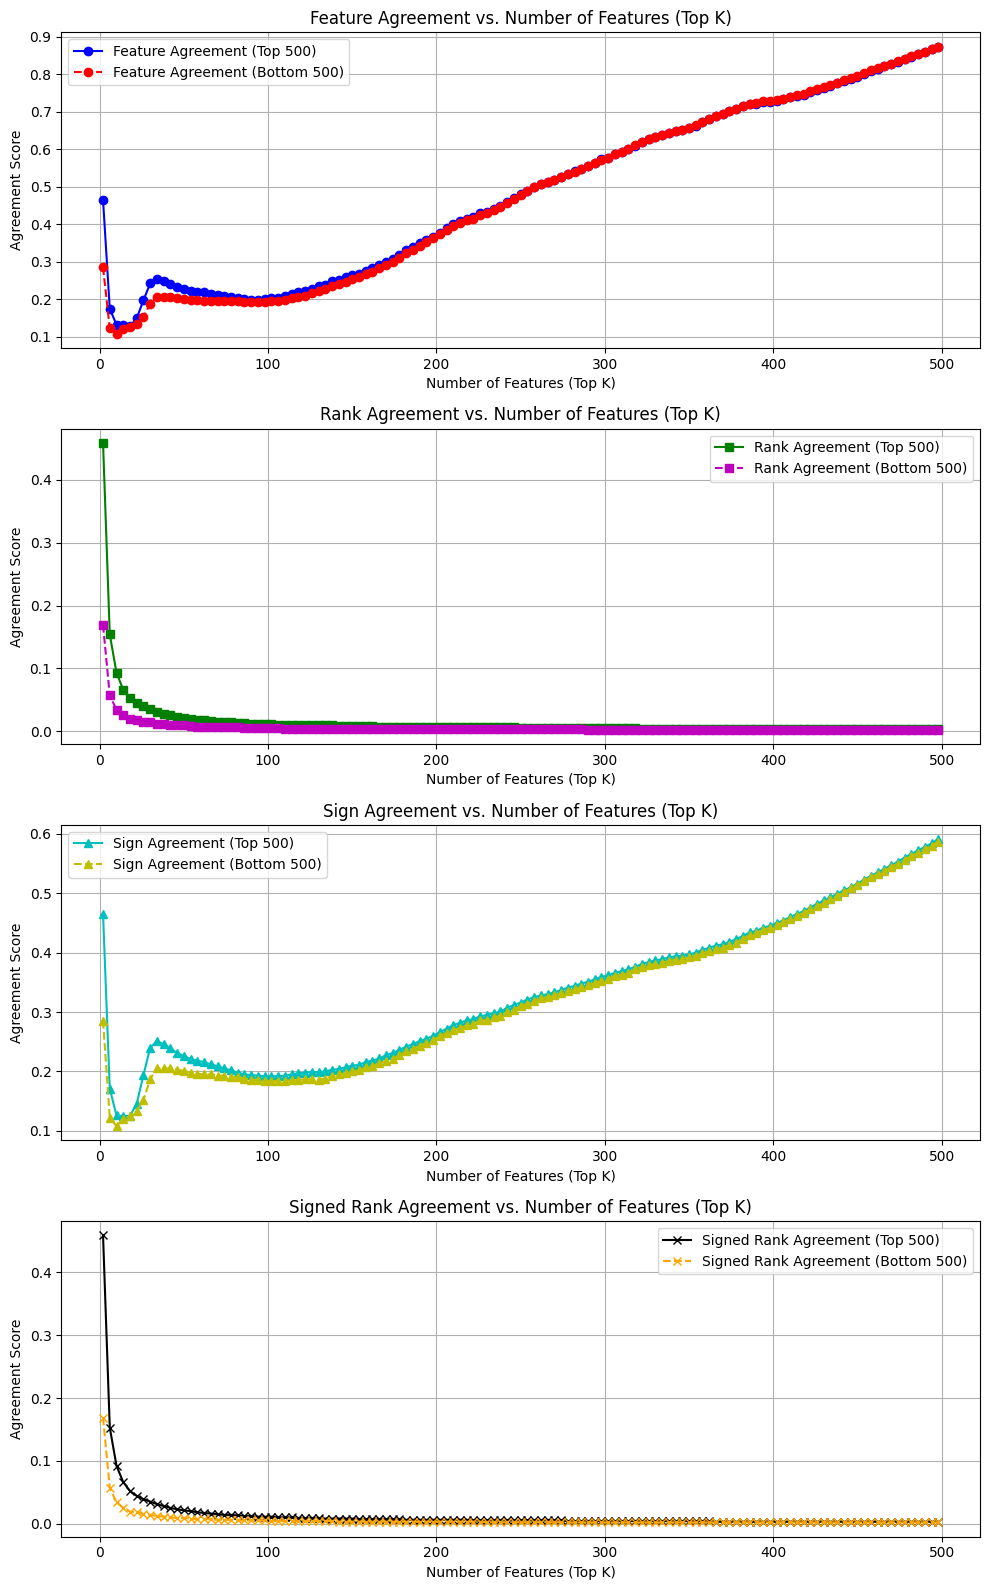

In [31]:
import matplotlib.pyplot as plt


values_of_500 = range(2,500,4)
feature_agreement_top = disgreement_mean_across__top_500_various_k["feature_agreement"]
rank_agreement_top = disgreement_mean_across__top_500_various_k["rank_agreement"]
sign_agreement_top = disgreement_mean_across__top_500_various_k["sign_agreement"]
signed_rank_agreement_top = disgreement_mean_across__top_500_various_k["signed_rank_agreement"]


feature_agreement_bottom = disgreement_mean_across__bottom_500_various_k["feature_agreement"]
rank_agreement_bottom = disgreement_mean_across__bottom_500_various_k["rank_agreement"]
sign_agreement_bottom = disgreement_mean_across__bottom_500_various_k["sign_agreement"]
signed_rank_agreement_bottom = disgreement_mean_across__bottom_500_various_k["signed_rank_agreement"]


# Create separate subplots for each agreement metric
fig, axs = plt.subplots(4, 1, figsize=(10, 16))

# Plot Feature Agreement for top 500
axs[0].plot(values_of_500, feature_agreement_top, label='Feature Agreement (Top 500)', marker='o', color='b')
axs[0].plot(values_of_500, feature_agreement_bottom, label='Feature Agreement (Bottom 500)', linestyle='--', marker='o', color='r')
axs[0].set_xlabel('Number of Features (Top K)')
axs[0].set_ylabel('Agreement Score')
axs[0].set_title('Feature Agreement vs. Number of Features (Top K)')
axs[0].legend()
axs[0].grid(True)

# Plot Rank Agreement for top 500
axs[1].plot(values_of_500, rank_agreement_top, label='Rank Agreement (Top 500)', marker='s', color='g')
axs[1].plot(values_of_500, rank_agreement_bottom, label='Rank Agreement (Bottom 500)', linestyle='--', marker='s', color='m')
axs[1].set_xlabel('Number of Features (Top K)')
axs[1].set_ylabel('Agreement Score')
axs[1].set_title('Rank Agreement vs. Number of Features (Top K)')
axs[1].legend()
axs[1].grid(True)

# Plot Sign Agreement for top 500
axs[2].plot(values_of_500, sign_agreement_top, label='Sign Agreement (Top 500)', marker='^', color='c')
axs[2].plot(values_of_500, sign_agreement_bottom, label='Sign Agreement (Bottom 500)', linestyle='--', marker='^', color='y')
axs[2].set_xlabel('Number of Features (Top K)')
axs[2].set_ylabel('Agreement Score')
axs[2].set_title('Sign Agreement vs. Number of Features (Top K)')
axs[2].legend()
axs[2].grid(True)

# Plot Signed Rank Agreement for top 500
axs[3].plot(values_of_500, signed_rank_agreement_top, label='Signed Rank Agreement (Top 500)', marker='x', color='k')
axs[3].plot(values_of_500, signed_rank_agreement_bottom, label='Signed Rank Agreement (Bottom 500)', linestyle='--', marker='x', color='orange')
axs[3].set_xlabel('Number of Features (Top K)')
axs[3].set_ylabel('Agreement Score')
axs[3].set_title('Signed Rank Agreement vs. Number of Features (Top K)')
axs[3].legend()
axs[3].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

